TODO
- data augmentation?

# Flower Recognition

In [101]:
from os import listdir
import numpy as np
from PIL import Image
from random import shuffle

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import cifar10
import matplotlib.pyplot as plt


In [51]:
data_dir = 'flowers/'
flower_file_names = listdir('flowers')

##### Misc data exploration

In [52]:
# In order to identically scale the images, it's best we know the minimum resolution

min_image_width = 10000
min_image_heigth = 10000

for i in flower_file_names:
    image = Image.open(data_dir + i)
    
    if image.height < min_image_width:
        min_image_width = image.height
        
    if image.height < min_image_heigth:
        min_image_heigth = image.width

print(f'min image reslution: {min_image_width}x{min_image_heigth}')

min image reslution: 80x134


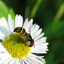

In [50]:
# TESTING

image = Image.open('flowers/daisy (1).jpg')
image.resize((64, 64))

##### Load and format the data in an understandable and standardized way

In [114]:
x, y = [], []

# Categorical label encoding scheme (much like the cifar10 dataset)
flower_names_scheme = {
    'daisy': 0,
    'dandelion': 1,
    'rose': 2,
    'sunflower': 3,
    'tulip': 4
}


# Shuffle (randomize) the file names in order to randomize the train and ground truth data 
shuffle(flower_file_names)


for file_count, flower_file_name in enumerate(flower_file_names):
    # don't spam the fucking output
    if file_count % 500 == 0: print(f'Loading {file_count}/{len(flower_file_names)}')
    
    image = Image.open(data_dir + flower_file_name)
    
    # Doing basic scaling, as it'll do for the task at hand.
    image = image.resize((64, 64))
    
    x.append(np.array(image))
    
    flower_name = flower_file_name.split(' ')[0]
    
    y.append(flower_names_scheme[flower_name])
    
    
x, y = np.array(x), np.array(y)

Loading 0/4317
Loading 500/4317
Loading 1000/4317
Loading 1500/4317
Loading 2000/4317
Loading 2500/4317
Loading 3000/4317
Loading 3500/4317
Loading 4000/4317


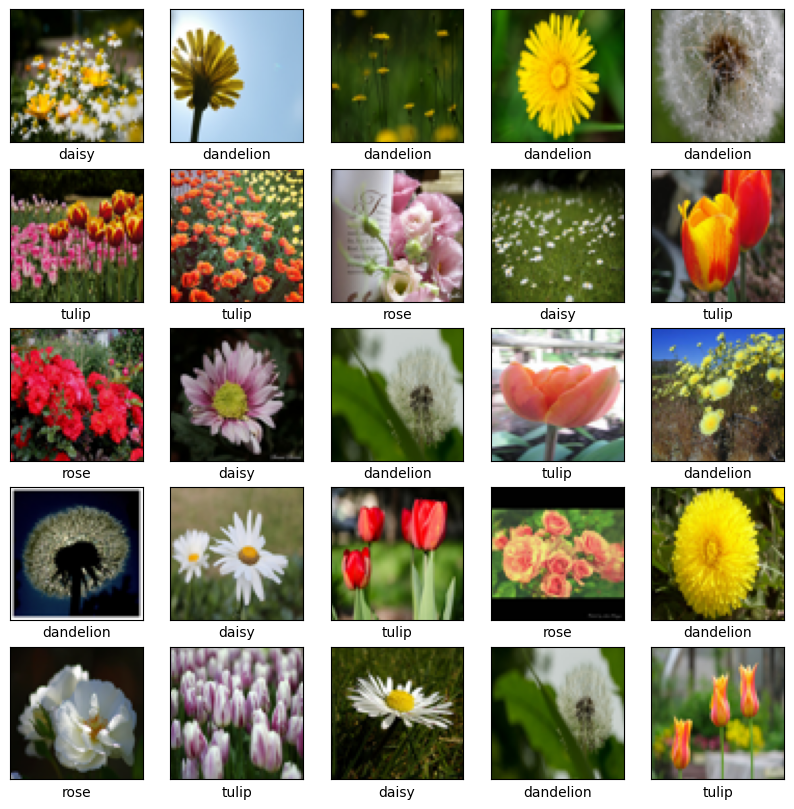

In [111]:
# Easier/cleaner than doing a reverse lookup using flower_names_scheme
flower_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    
    plt.grid(False)
    plt.imshow(x[i])
    
    plt.xlabel(flower_names[y[i]])

plt.show()